# Introducción al entorno de trabajo
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>

## Reconociendo el entorno de Jupyter Notebook
Jupyter Notebook es una aplicación web de código abierto que facilita la computación interactiva y colaborativa en docenas de lenguajes de programación, incluidos Python, R y julia; tres lenguajes muy populares entre los cientificos de datos en la actualidad.

### Agenda
1. Empezando con Jupyter
1. Importando librerias
1. Ejecutando código


## 1. Empezando
---
El proyecto Jupyter permite crear y compartir mediante una web documentos que contienen código de simulacion numérica en vivo, ecuaciones en <code>LaTeX</code>, distintas visualizaciones graficas y texto narrativo en un mismo lugar.

Actualmente está viendo un editor de texto plano basado en <code>Jupyter Notebook</code>. Es un documento interactivo que admite la combinación de código, salida estandar y documentación en formato markdown.

Esta celda es una celda de documentacion en markdown; para editar el texto en esta celda, simplemente haga doble clic en la celda para cambiar al modo de edición.

La celda a continuación es una celda de código. Puede cambiar una celda entre código y documentacion desde la lista desplegable o haciendo click en los braquets de la parte superior, segun el entorno de trabajo.

Tambien es posible conmutar entre los tipos de celda pulsando los atajos de teclado:
* <code>tecla M</code>: celda de documentación.
* <code>tecla Y</code>: celda de código.

In [1]:
# [Python] - Asignacion multiple de variables
a, b, c = 1 , 2, 3
print(b)
type(b)

2


int

In [2]:
# [Python] - Asignacion multiple usando funciones que retornan multiples valores
def multiple(a, b, c):
    x, y, z = a, b, c
    return x, y, z
p = multiple(a, b, c)
print(p)
type(p)

(1, 2, 3)


tuple

## 2. Importando Librerias
---
Como se menciona en la seccion de generalidades de Python, la mayor parte del poder de un lenguaje de programación está en sus bibliotecas. jupyter permite importar módulos de Python de la forma tradicional; incluso el comando <code>help()</code> funciona como se espera.

En el desarrollo de la tematica del curso es posble que importemos varios entre los que se incluye <code>PyLab</code> que es una super libreria que incluye:
<ul>
    <li><code>numpy</code> - Herramientas de computación numérica basado en matrices n-dimensionales</li>
    <li><code>sympy</code> - Herramientas de computación algebraica</li>
    <li><code>pandas</code> - Herramientas de lectura y analisis de datos</li>
    <li><code>matplotlib</code> - Herramientas para generar graficos 2D/3D</li>
</ul>

Otras herrameintas en PyLab
<ul>
    <li><code>scipy</code> - Herramientas de computación numérica </li>
    <li><code>ipython</code> - Herramientas de computación numérica </li>
</ul>

In [3]:
# [Python] - Importando modulos
import math as mt
import numpy as np
import pylab as pl

## 3. Ejecutando código
---
Antes de iniciar la ejecucion del codigo debe escoger el nucleo o <code>Kernel</code> para la ejecucion de dicho codigo; en este curso usaremos el lenguaje Python en su version 3.8, pero tambien son posibles otros lenguajes de programación y versiones de python como ya se mencionó anteriormente.

Puede elegir ejecutar celdas de diferentes maneras:
* Una celda individual
* Todas las celdas hacia abajo.
* Todas las celdas hacia arriba.
* Todas las celdas de código en un <code>Jupyter Notebook</code>.

>**NOTA:** siempre tenga en cuenta que si una celda no ha sido ejecutada sus resultados no estaran disponibles y entonces la ejecucion de una celda que necesite esos datos puede fallar o dar resultados incorrectos.

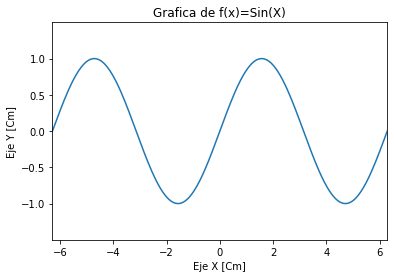

In [4]:
# [Python] - Graficas
x  = np.linspace(-2*np.pi, 2*np.pi, 256, endpoint=True)

y1 = np.sin(x)

pl.plot(x,y1)
pl.xlim(x.min(), x.max())
pl.ylim(y1.min()*1.5, y1.max()*1.5)
pl.title("Grafica de f(x)=Sin(X)")
pl.xlabel("Eje X [Cm]")
pl.ylabel("Eje Y [Cm]")
pl.show()

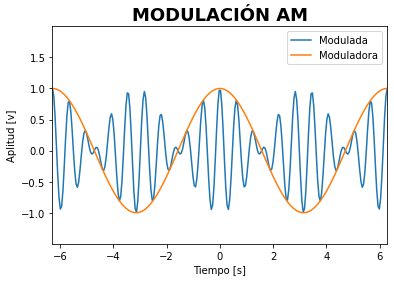

In [5]:
# [Python] - Multiples Graficas
y2 = np.cos(x)*np.cos(10*x)
y3 = np.cos(x)
pl.plot(x, y2, label="Modulada")
pl.plot(x, y3, label="Moduladora")
pl.xlim(x.min(), x.max())
pl.ylim(y1.min()*1.5, y1.max()*2)
pl.title("Modulación AM".upper(), fontsize=18, fontweight="bold")
pl.xlabel("Tiempo [s]")
pl.ylabel("Aplitud [v]")
pl.legend()
pl.show()

---
## Mas Recursos

- [Documentacion oficial de Jupyter](https://jupyter.org/documentation)
- [Documentacion de Jupytermin VSCode](https://code.visualstudio.com/docs/python/jupyter-support)
